# Lab 9: Naive Bayes and K-Nearest Neighbor


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, preprocessing, model_selection, decomposition
from sklearn import neighbors, naive_bayes, metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2
%matplotlib notebook

## Task 1: Load the digits dataset

We're going to be seeing if we can use Naive Bayes and K-Nearest Neighbor to classify hand writing data.  The [digits dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html) is a set of 1797 8x8 pixel images, representing handwriting samples of the numbers 0-9.

1. Load the [digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Use the `return_X_y` paramter so that it returns both the X data and y classifications.
2. Use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to fit and tranform the X data.
3. Use [train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the X data and y classifications, into an X_training dataset, X_testing dataset and the corresponding y_training labels and y_testing labels.  Set the test size be .3 and shuffle to True.
4. Print the shape of X_training, X_testing, y_training, and y_testing.

In [3]:
np.random.seed(42)

X, y_results = datasets.load_digits(return_X_y = True)

scaler = preprocessing.StandardScaler(copy = False)
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_results, test_size = 0.3, shuffle = True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('''
X training data shape:  (1257, 64)
X testing data shape:   (540, 64)
y training labels shape:(1257,)
y testing labels shape: (540,)
''')

(1257, 64)
(540, 64)
(1257,)
(540,)

X training data shape:  (1257, 64)
X testing data shape:   (540, 64)
y training labels shape:(1257,)
y testing labels shape: (540,)



## Task 2: PCA decomposition and plot results

This dataset has way too many dimensions.  Let's use PCA decomposition to project the data to a lower dimensional space to visualize it. 

1. Use [PCA decomposition](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to fit a principle component analysis model with 3 components to the scaled X data and transform the data. (Do not overwrite your X data.)
3. Create a [3D scatterplot](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) of the transformed X dataset.  
    1. Map the y labels to the colors. 
    2. Choose a qualitative colormap [colormap](https://matplotlib.org/tutorials/colors/colormaps.html) which has atleast 10 distinct colors.
    3. Give the plot meaningful axis labels and a title.
    4. Remember to call `plt.show()` at the end, or other plots later might not work.

<IPython.core.display.Javascript object>


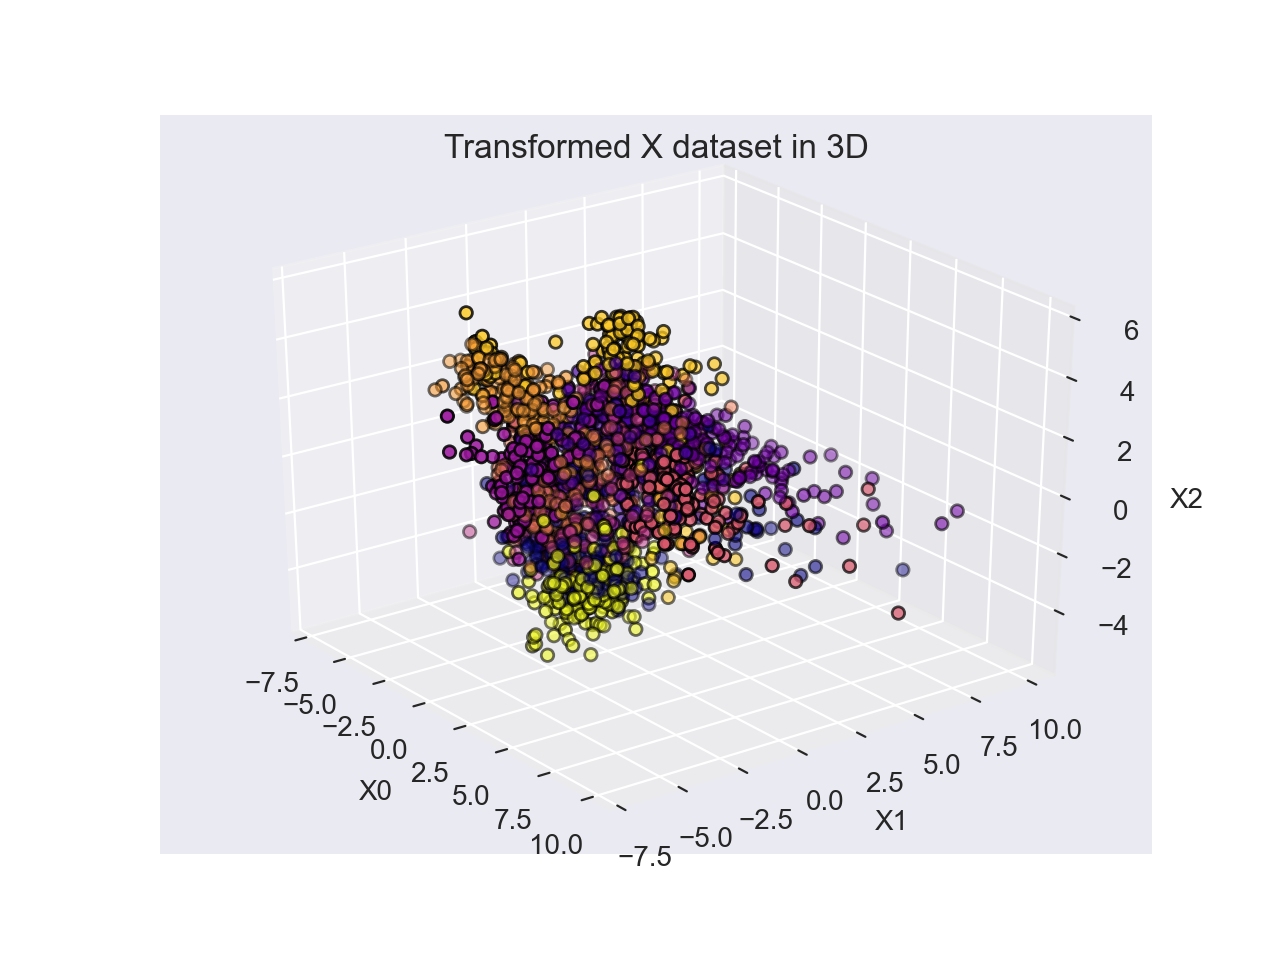

In [4]:
pca = decomposition.PCA(n_components = 3)
pca.fit(X)
X_new = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_new[:,0], X_new[:,1], X_new[:,2], c = y_results, cmap = 'plasma_r', edgecolors = 'black')

ax.set_xlabel("X0")
ax.set_ylabel("X1")
ax.set_zlabel("X2")
ax.set_title("Transformed X dataset in 3D")

plt.show()

## Task 3: Create Classifiers and Calculate Accuracy

### Create a Naive Bayes Classifier
1. Create a [Gaussian Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) [(More Info)](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes). 
2. Use the fit method with the training dataset as X and the y training dataset labels as the target.
3. Calculate the accuracy of the classifier with the test data and test dataset labels using the score method.
4. Print the accuracy of the Naive Bayes classifier.

### Create a K-NN Classifier
1. Using the lab from last week as reference, create a [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) [(More Info)](https://scikit-learn.org/stable/modules/neighbors.html#classification).  Set n_neighbors equal to 7.
1. Assign your classifier to a variable with a **different** name than your Naive Bayes classifier.  
2. Use the fit method with the training dataset as X and the y training dataset labels as the target.
3. Calculate the accuracy of the classifier with the test data and test dataset labels using the score method.
4. Print the accuracy of the K-NN classifier.


In [5]:
gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)
acc = gnb.score(X_test, y_test)
print(acc)

neigh = neighbors.KNeighborsClassifier(n_neighbors = 7)
neigh.fit(X_train, y_train)
acc = neigh.score(X_test, y_test)
print(acc)

print('''
Gaussian Naive Bayes Classifier Accuracy: 0.787...
K-Nearest Neighbor Classifier Accuracy:   0.979...
''')

0.7870370370370371
0.9796296296296296

Gaussian Naive Bayes Classifier Accuracy: 0.787...
K-Nearest Neighbor Classifier Accuracy:   0.979...



## Task 4: Create a confusion matrix for each classifier

1. Find the predicted labels for the X test data using the Naive Bayes classifier and K-NN classifier.
1. Create a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for each classifier, using the predicted and actual labels.  
1. Print the confusion matrices.
2. Visualize the confusion matrices using imshow. For reference, use Lab 5 and this [matplotlib example](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html) of an annotated heatmap.
    1. Set x_ticks and y_ticks to align with the list of digits.
    2. Use imshow to draw the matrix
    3. Choose a perceptually uniform [colormap](https://matplotlib.org/tutorials/colors/colormaps.html)
    3. Use a colorbar to labe the matrix
    4. Remember to call `plt.show()` at the end, or other plots later might not work.
    5. Give your plot a meaningful title.
    
#### Review Question: Which digits are most likely to be misclassified and what are they most likely to be misclassified as?

In [6]:

print('''
K-Nearest Neighbor Confusion Matrix
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 53  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  2]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  1  0 53  0  1]
 [ 0  1  0  0  0  0  0  0 42  0]
 [ 0  0  0  1  1  1  1  0  0 55]]
Gaussian Naive Bayes Confusion Matrix
[[52  0  0  0  0  0  0  1  0  0]
 [ 0 33  0  0  0  0  2  6  6  3]
 [ 0  6 19  1  0  4  1  0 16  0]
 [ 0  0  2 37  0  0  1  1  9  4]
 [ 1  0  0  0 36  0  5 18  0  0]
 [ 0  0  0  0  0 62  1  2  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  0]
 [ 0  2  0  0  0  0  0  3 38  0]
 [ 0  1  1  1  0  2  1  7  4 42]]
''')


K-Nearest Neighbor Confusion Matrix
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 53  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  2]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  1  0 53  0  1]
 [ 0  1  0  0  0  0  0  0 42  0]
 [ 0  0  0  1  1  1  1  0  0 55]]
Gaussian Naive Bayes Confusion Matrix
[[52  0  0  0  0  0  0  1  0  0]
 [ 0 33  0  0  0  0  2  6  6  3]
 [ 0  6 19  1  0  4  1  0 16  0]
 [ 0  0  2 37  0  0  1  1  9  4]
 [ 1  0  0  0 36  0  5 18  0  0]
 [ 0  0  0  0  0 62  1  2  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  0]
 [ 0  2  0  0  0  0  0  3 38  0]
 [ 0  1  1  1  0  2  1  7  4 42]]

